In [2]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

#importing dataset using panda
data = pd.read_csv('kc_house_data.csv')
#to see what my dataset is comprised of
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
# Define the independent variables (features) and the dependent variable (target)
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = data['price']

In [4]:
# Add a constant term to the independent variables for the intercept term
X = sm.add_constant(X)

In [5]:
# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

In [6]:
# Print the coefficients
print("Coefficients:")
print(model.params)

# Additional statistics
print("\nAdditional Statistics:")
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)
print("Standard errors of coefficients:", model.bse)
print("t-values:", model.tvalues)
print("p-values:", model.pvalues)

Coefficients:
const            6.690325e+06
bedrooms        -3.576654e+04
bathrooms        4.114428e+04
sqft_living      1.104414e+02
sqft_lot         1.285979e-01
floors           6.689550e+03
waterfront       5.829605e+05
view             5.287094e+04
condition        2.638565e+04
grade            9.589045e+04
sqft_above       7.078672e+01
sqft_basement    3.965913e+01
yr_built        -2.620223e+03
yr_renovated     1.981258e+01
zipcode         -5.824199e+02
lat              6.027482e+05
long            -2.147298e+05
sqft_living15    2.168140e+01
sqft_lot15      -3.826418e-01
dtype: float64

Additional Statistics:
R-squared: 0.6997471890109156
Adjusted R-squared: 0.6995108242141194
Standard errors of coefficients: const            2.931485e+06
bedrooms         1.891843e+03
bathrooms        3.253678e+03
sqft_living      2.269596e+00
sqft_lot         4.792237e-02
floors           3.595859e+03
waterfront       1.736010e+04
view             2.140055e+03
condition        2.351461e+03
grade

In [7]:
# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        09:04:12   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.69e+06   2.93e+06      2.282

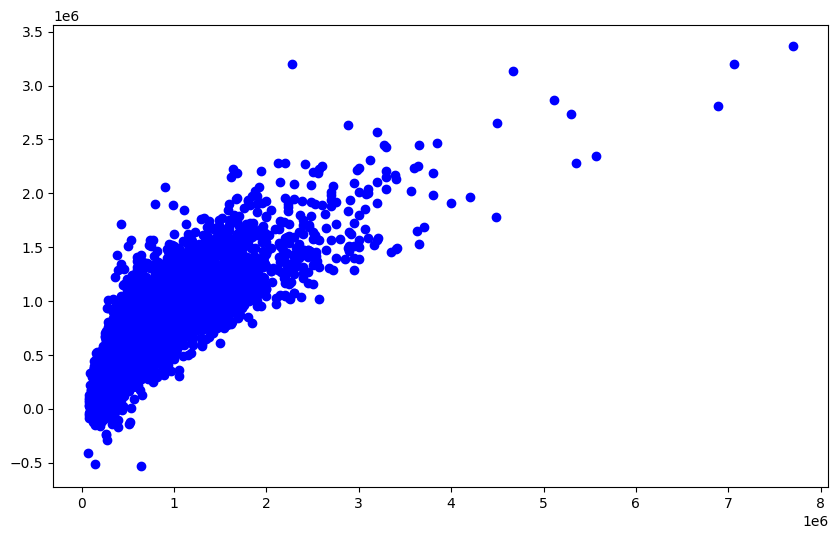

In [8]:
# Get the predicted values
results = model
y_pred = results.predict(X)

# Get the predicted values
y_pred = results.predict(X)

# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, c='blue', label='Actual vs. Predicted')

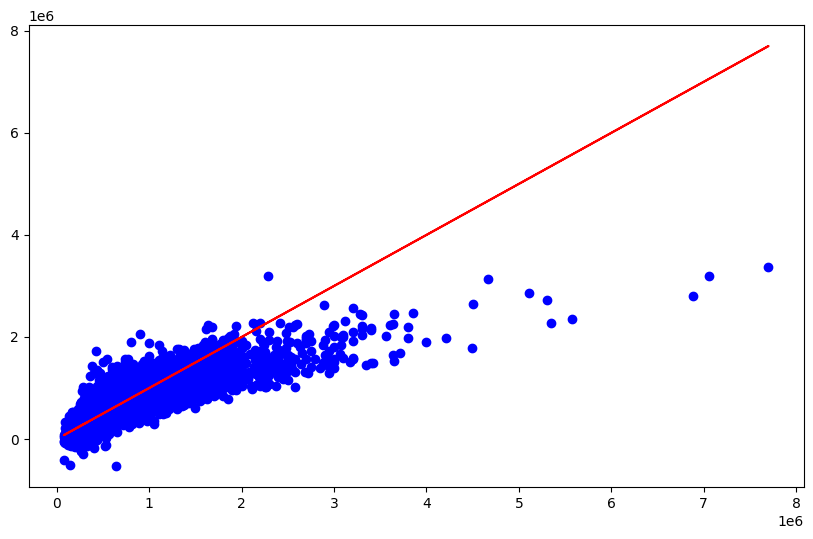

In [9]:
# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, c='blue', label='Actual vs. Predicted')
# Plot the regression line
plt.plot(y, y, c='red', label='Regression Line')

**SimpleReg**

In [10]:
import pandas as pd

# Reading csv file from github repo
advertising = pd.read_csv('tvmarketing.csv')

# Display the first 5 rows
advertising.head()

TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9

In [11]:
# Display the last 5 rows
advertising.tail()

TV  Sales
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

In [12]:
# Check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [13]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [14]:
# Look at some statistical information about the dataframe.
advertising.describe()

TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000

<Axes: xlabel='TV', ylabel='Sales'>

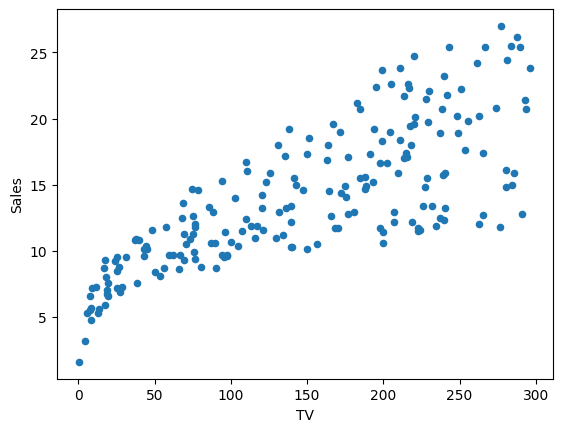

In [15]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

In [16]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [17]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [18]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [19]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [20]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [22]:
#It is a general convention in scikit-learn that observations are rows, while features are columns.
#This is needed only when you are using a single feature; in this case, 'TV'.

#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X_train and X_test are pandas Series
X_train = X_train.to_numpy()[:, np.newaxis]
X_test = X_test.to_numpy()[:, np.newaxis]

# Alternatively, you can convert them directly when creating the train-test split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy()[:, np.newaxis], y, test_size=0.3, random_state=42)

# Ensure X_train and X_test are numpy arrays
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [24]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

7.239459830751138
[0.0464078]


In [26]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [27]:
type(y_pred)

numpy.ndarray

In [28]:
y_test.shape # cheek the shape to generate the index for plot

(60,)

Text(0, 0.5, 'Sales')

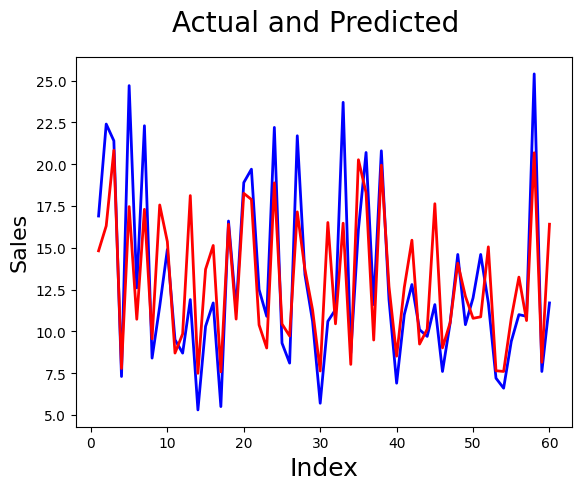

In [29]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

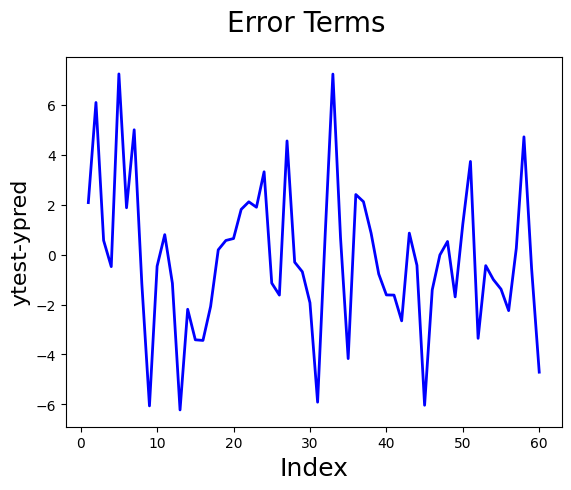

In [30]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [32]:
r_squared = r2_score(y_test, y_pred)

In [33]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 8.970991242413614
r_square_value : 0.6714477229302764


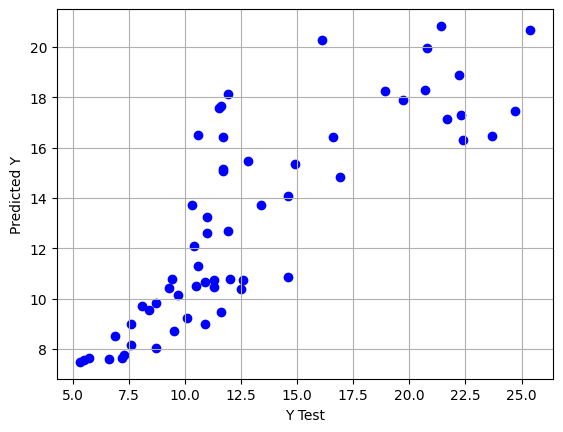

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

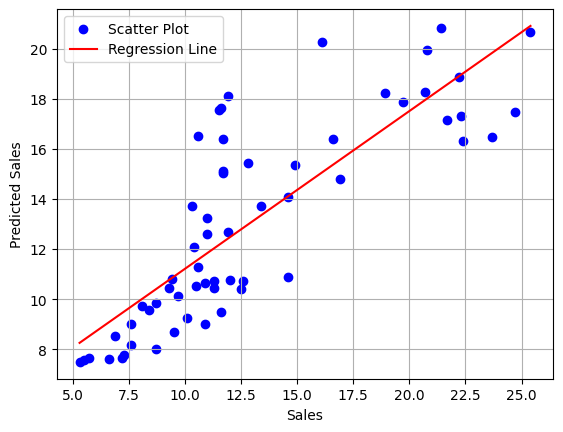

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the slope and intercept of the regression line
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Generate x values for the regression line
x_values = np.linspace(min(y_test), max(y_test), 100)
# Calculate corresponding y values using the regression line equation
y_values = slope * x_values + intercept

# Plot the scatter plot
plt.scatter(y_test, y_pred, c='blue', label='Scatter Plot')

# Plot the regression line
plt.plot(x_values, y_values, c='red', label='Regression Line')

plt.xlabel('Sales')
plt.ylabel('Predicted Sales')
plt.grid()
plt.legend()
plt.show()

**SimpleRegAct**

In [36]:
import pandas as pd
# Reading csv file from github repo
df = pd.read_csv('tvmarketing.csv')
# Display the first 5 rows
df.head()

TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9

In [37]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [38]:
# Extract the features (TV) and target variable (Sales)
TV = df['TV'].values.reshape(-1, 1)
Sales = df['Sales'].values

In [39]:
# Create a linear regression model
model = LinearRegression()

In [40]:
# Fit the model
model.fit(TV, Sales)

LinearRegression()

In [41]:
# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 7.032593549127695
Coefficient: 0.04753664043301975


In [42]:
# Predict using the model
Sales_pred = model.predict(TV)

In [43]:
from sklearn.metrics import mean_squared_error
# Calculate mean squared error
mse = mean_squared_error(Sales, Sales_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.512652915656757


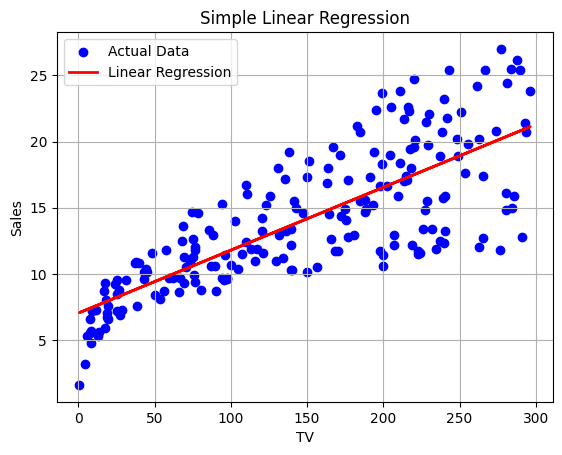

In [44]:
# Plot the data and the regression line
plt.scatter(TV, Sales, color='blue', label='Actual Data')
plt.plot(TV, Sales_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()